In [ ]:
#GradientBoostingRegressor model

from google.colab import files
import os
import pandas as pd
import numpy as np

# Create the upload button
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_raw = pd.read_csv(file_name)

print(f"\n Successfully uploaded: {file_name}")

In [8]:
# Standardize column names
df = df_raw.copy()
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Identify the target (Price) column
possible_targets = ['price', 'saleprice', 'median_house_value', 'value', 'amount']
target_col = next((col for col in possible_targets if col in df.columns), df.columns[-1])

# Basic Data Cleaning
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Handle missing values
df = df.dropna(subset=[target_col])
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("="*50)
print(f"CLEANED DATASET PREVIEW (Target: {target_col})")
print("="*50)
display(df.head(5))
print("="*50)

CLEANED DATASET PREVIEW (Target: y_house_price_of_unit_area)


,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select only numeric features
X = df.select_dtypes(include=[np.number]).drop(columns=[target_col])
y = df[target_col]

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" Pre-processing Complete: {X.shape[1]} features prepared.")

✔️ Pre-processing Complete: 7 features prepared.



****************************************
FINAL ACCURACY (R2): 77.93%
AVERAGE PRICE ERROR: $4.09
****************************************


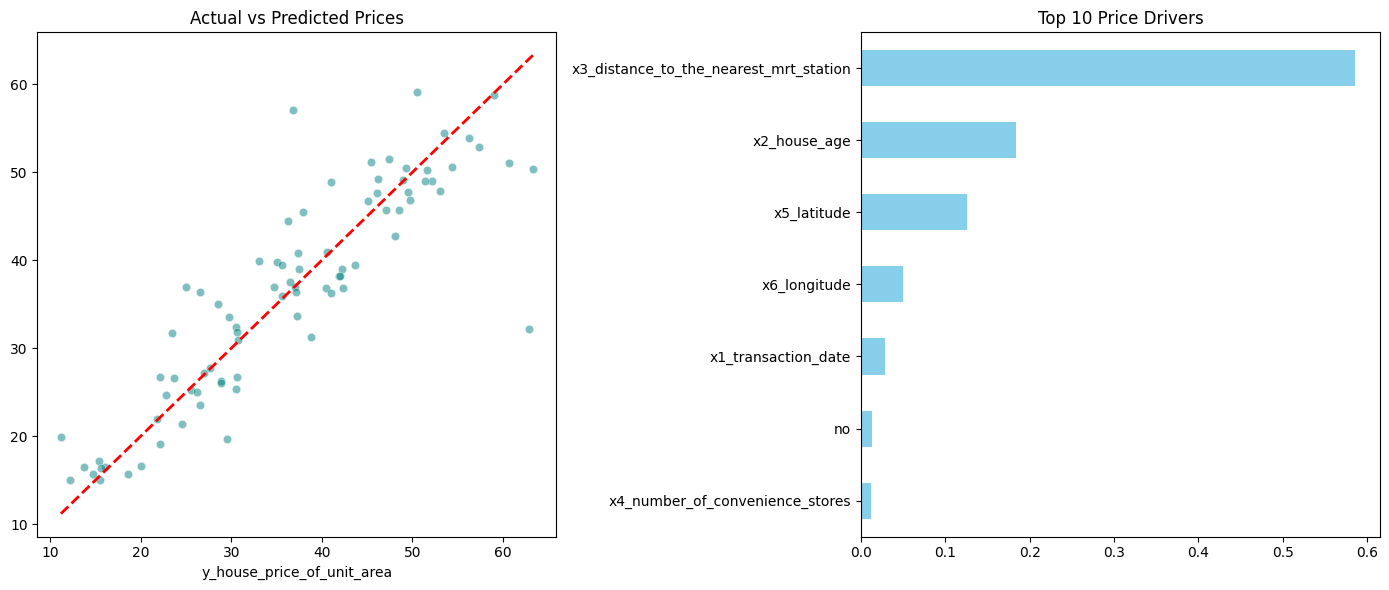

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Training
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = r2_score(y_test, y_pred)
error = mean_absolute_error(y_test, y_pred)

print("\n" + "*"*40)
print(f"FINAL ACCURACY (R2): {accuracy:.2%}")
print(f"AVERAGE PRICE ERROR: ${error:,.2f}")
print("*"*40)

# Visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
feat_importances = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Price Drivers')

plt.tight_layout()
plt.show()

In [11]:
#Random Forest
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_raw = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\n File '{file_name}' successfully uploaded.")

Saving Real estate.csv to Real estate (4).csv

✅ File 'Real estate (4).csv' successfully uploaded.


In [13]:

#Data Cleaning
import numpy as np

# Standardize column names
df = df_raw.copy()
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Identify target
possible_targets = ['price', 'saleprice', 'median_house_value', 'value', 'amount']
target_col = next((col for col in possible_targets if col in df.columns), df.columns[-1])

# Drop IDs and fill missing values
if 'id' in df.columns:
    df = df.drop(columns=['id'])

df = df.dropna(subset=[target_col])
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("="*50)
print(f"CLEANED DATA PREVIEW (Target: {target_col})")
print("="*50)
display(df.head(5))
print("="*50)

CLEANED DATA PREVIEW (Target: y_house_price_of_unit_area)


,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
#Data preprossing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Selection
X = df.select_dtypes(include=[np.number]).drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" Preprocessing Complete. Prepared {X_train_scaled.shape[0]} training samples.")

✔️ Preprocessing Complete. Prepared 331 training samples.



***************
RANDOM FOREST ACCURACY: 80.31%
MEAN ABSOLUTE ERROR: $3.91
***************


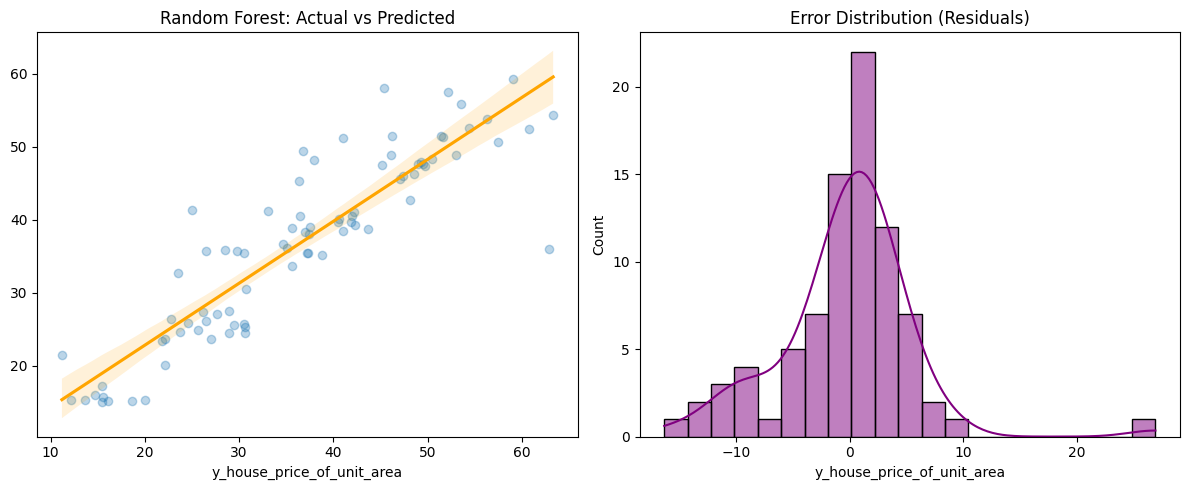

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
# n_estimators=200 increases the number of trees for better stability
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Accuracy Metrics
accuracy = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n" + "*"*15)
print(f"RANDOM FOREST ACCURACY: {accuracy:.2%}")
print(f"MEAN ABSOLUTE ERROR: ${mae:,.2f}")
print("*"*15)

# Visualizing Improvement
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
plt.title('Random Forest: Actual vs Predicted')

# Plot 2: Error Distribution
plt.subplot(1, 2, 2)
errors = y_test - y_pred
sns.histplot(errors, kde=True, color='purple')
plt.title('Error Distribution (Residuals)')

plt.tight_layout()
plt.show()